In [17]:
import plotly.graph_objects as go
import networkx as nx

# reading input log file

test_name = "seq2t"

stat_path=f"example_stat/{test_name}"
image_path=f"{stat_path}/images"

In [18]:
# My utility functions
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vfd_stat2graph as vfd2g
import utils.vfd_graph2sankey as vfd2sk

# Improve Functions
## TODO
- Add dataset nodes
- Add file address ordering nodes


In [19]:
STAGE_START = 0
STAGE_END = 10


TASK_ORDER_LIST = sload.load_task_order_list(stat_path)
STAGE_END = sload.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = sload.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS


STAGE_END is not in TASK_ORDER_LIST, set to max order: 8
TASK_ORDER_LIST = {'run_idfeature': 0, 'run_tracksingle': 1, 'run_gettracks': 2, 'run_trackstats': 3, 'run_identifymcs': 4, 'run_matchpf': 5, 'run_robustmcs': 6, 'run_mapfeature': 7, 'run_speed': 8}


['run_idfeature',
 'run_tracksingle',
 'run_gettracks',
 'run_trackstats',
 'run_identifymcs',
 'run_matchpf',
 'run_robustmcs',
 'run_mapfeature',
 'run_speed']

In [20]:
vfd_files = sload.find_files_with_pattern(stat_path, "vfd")
# vfd_files = vfd_files[0:1]
print(vfd_files)

vfd_dict = sload.load_stat_json(vfd_files)
# print(vfd_dict)

print("loading yaml done")

['example_stat/seq2t/229724-vfd_data_stat.json']
loading example_stat/seq2t/229724-vfd_data_stat.json
loading yaml done


In [21]:
# Show VFD Tracker overhead
sp.show_all_overhead("VFD", vfd_dict)

Total VFD overhead: 123.0 ms
Total POSIX IO time: 79.0 ms


In [22]:
G_VFD = nx.DiGraph()
G_VFD = vfd2g.add_task_file_nodes(G_VFD, vfd_dict, TASK_LISTS)

stat_file: example_stat/seq2t/229724-vfd_data_stat.json


In [23]:
task_file_map = sload.load_task_file_map(stat_path, test_name, TASK_LISTS)

for task, stat in task_file_map.items():
    print(f"{task} : {stat}")

task_file_map = {'run_gettracks-229724': {'order': '2', 'io_cnt': 260, 'input': ['/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_010000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_000000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_010000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_020000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_020000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_030000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cloudid_20150506_030000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/track_20150506_040000.nc', '/home/mtang11/experiments/flextrkr_runs/dl_run_mcs_tbpfradar3d_wrf/tracking/cl

In [24]:
G_VFD = vfd2g.set_task_position(G_VFD, task_file_map)

task_name: run_gettracks-229724, task_order: 2
node run_gettracks-229724 : {'pos': (0, 0), 'rpos': 0, 'order': 1, 'type': 'task'}, pos: (0, 0)
node : run_gettracks-229724, pos: (4, 0)
task_name: run_trackstats-229724, task_order: 3
node run_trackstats-229724 : {'pos': (0, 0), 'rpos': 0, 'order': 27, 'type': 'task'}, pos: (0, 0)
node : run_trackstats-229724, pos: (6, 0)


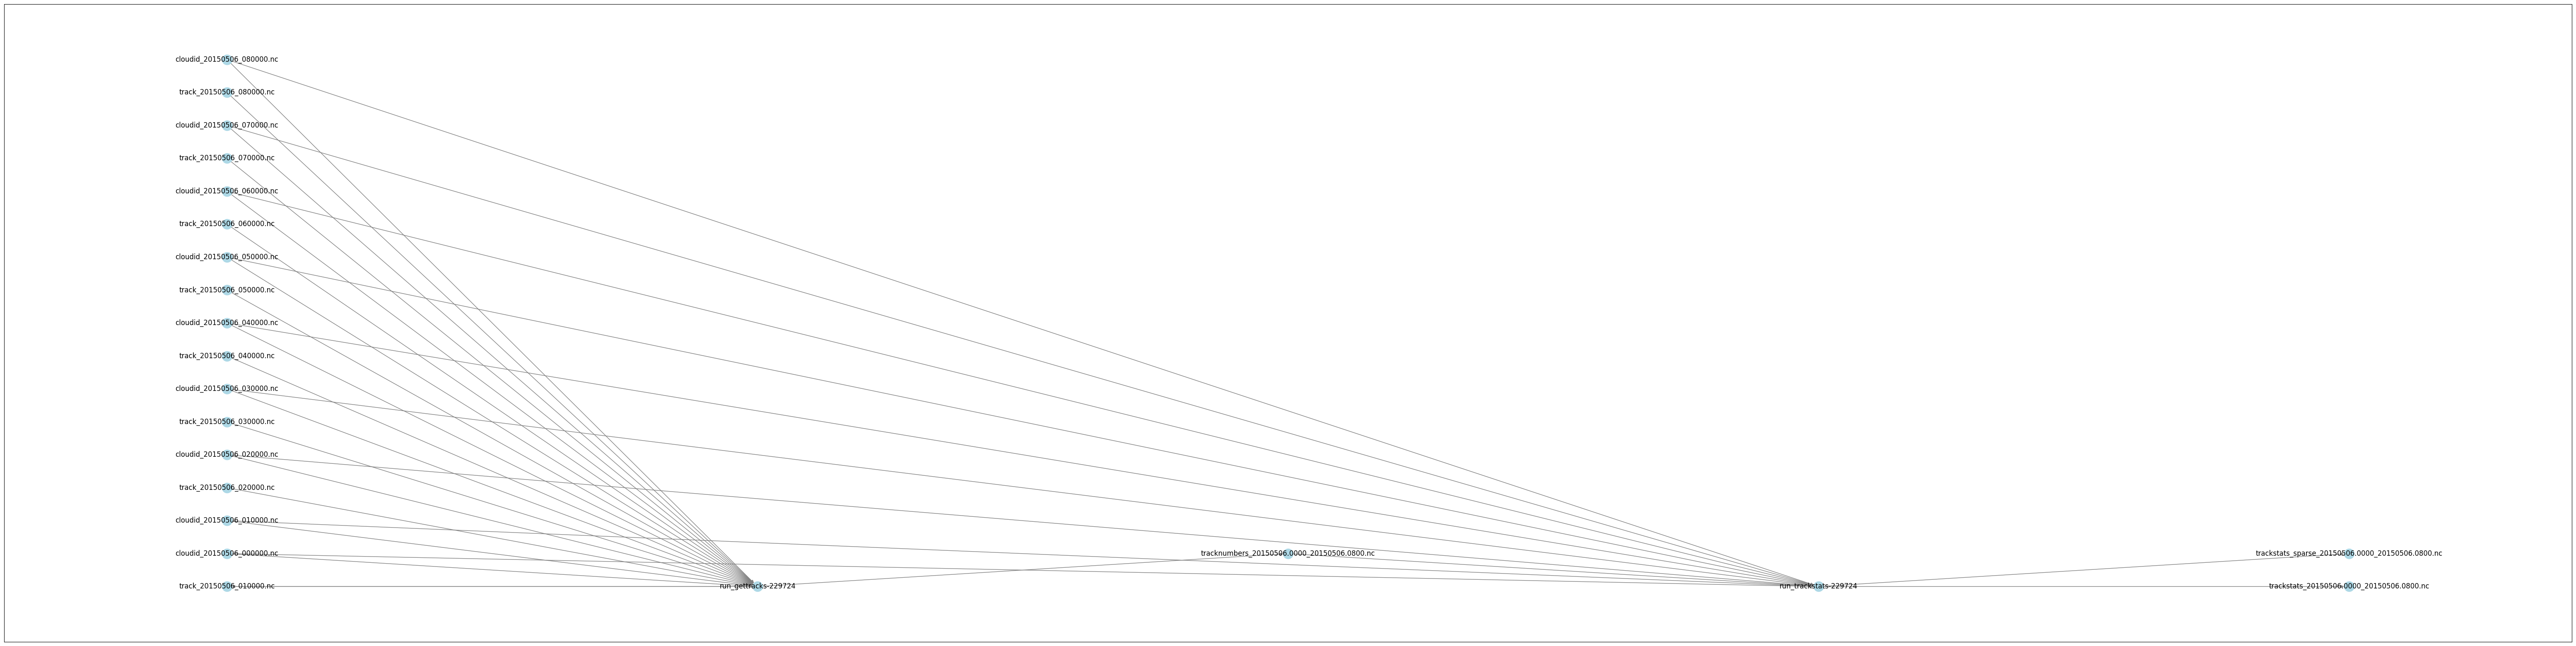

In [25]:
# sp.display_all_nodes_attr(G_VFD)
G_VFD = vfd2g.set_file_position(G_VFD, task_file_map)
# sp.display_all_nodes_attr(G_VFD)

sp.draw_graph(G_VFD, test_name, stat_path, graph_type="vfd", prefix=f'{(STAGE_END+1)}s', save=True)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)




In [26]:
vfd2g.prepare_sankey_stat(G_VFD)

In [27]:
vfd2sk.time_to_file_x_pos(G_VFD)

All tasks:  ['run_gettracks-229724', 'run_trackstats-229724']
track_20150506_010000.nc New pos:  (3.0, 0)
cloudid_20150506_000000.nc New pos:  (3.03125, 1)
cloudid_20150506_010000.nc New pos:  (3.09375, 2)
track_20150506_020000.nc New pos:  (3.0625, 3)
cloudid_20150506_020000.nc New pos:  (3.15625, 4)
track_20150506_030000.nc New pos:  (3.125, 5)
cloudid_20150506_030000.nc New pos:  (3.21875, 6)
track_20150506_040000.nc New pos:  (3.1875, 7)
cloudid_20150506_040000.nc New pos:  (3.28125, 8)
track_20150506_050000.nc New pos:  (3.25, 9)
cloudid_20150506_050000.nc New pos:  (3.34375, 10)
track_20150506_060000.nc New pos:  (3.3125, 11)
cloudid_20150506_060000.nc New pos:  (3.40625, 12)
track_20150506_070000.nc New pos:  (3.375, 13)
cloudid_20150506_070000.nc New pos:  (3.46875, 14)
track_20150506_080000.nc New pos:  (3.4375, 15)
cloudid_20150506_080000.nc New pos:  (3.5, 16)
tracknumbers_20150506.0000_20150506.0800.nc New pos:  (5.0, 1)
trackstats_20150506.0000_20150506.0800.nc New pos:  (

In [28]:
vfd_nodes, vfd_nodes_dict = vfd2sk.get_nodes_for_sankey(G_VFD, label_on=True)

# print(vfd_nodes)

vfd_links = vfd2sk.get_links_for_sankey(G_VFD, vfd_nodes_dict, val_sqrt=False)
fig = go.Figure(go.Sankey(
            node = vfd_nodes,
            link = vfd_links, orientation='h'))

fig.update_layout(
    autosize=False,
    width=4200,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=100,
        pad=2
    ),
    font=dict(size=18),
)


fig.show()
save_html_path = f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-labeled-s4.html"
fig.write_html(save_html_path)
print(f"Sankey saved to {save_html_path}")

bandwidth range: 7.39 KB/s ~ 304.66 KB/s


Sankey saved to example_stat/seq2t/vfd-9s-seq2t-sankey-labeled-s4.html


In [29]:
stat_str = sp.show_vfd_stats(G_VFD)
print(stat_str)



Total number of links: 31
Total I/O size: 9.62 MB
Total I/O count: 2727
Total bandwidth: 3.63 MB/s
Average I/O size: 3.53 KB
Medium I/O size: 5.76 KB
Inital input size: 0



In [30]:
# Create a manual legend using annotations.

def add_legend_to_graph(fig,save_img=False):
    LEGEND_ITEMS = {
        "Tasks":{"color":"red", "text":"Tasks"},
        "Files":{"color":"blue", "text":"Files"},
        "Edges":{"color":"lightblue", "text":"File bandwidth, darker the color, higher the bandwidth"},
    }

    legend_items = [
        go.layout.Annotation(
            x=0.9,  # X-coordinate for legend item
            y=0.85 - i * 0.03,  # Y-coordinate for legend item (adjust for position)
            xref='paper',
            yref='paper',
            text=f"{item_type} - {LEGEND_ITEMS[item_type]['color']}",
            showarrow=False,
            font=dict(size=14, color=LEGEND_ITEMS[item_type]['color']),
            # bordercolor='grey',  # Set the border color for the legend box
            # borderwidth=1,  # Set the border width for the legend box
            bgcolor='rgba(255, 255, 255, 0.7)',  # Add a transparent background color
        )
        for i, item_type in enumerate(LEGEND_ITEMS.keys())
    ]
    fig.update_layout(annotations=legend_items)
    fig.show()
    if save_img:
        fig.write_html(f"{stat_path}/vfd-{(STAGE_END+1)}s-{test_name}-sankey-annotated.html")
